<a href="https://colab.research.google.com/github/titaniumsyrup/learners_space/blob/week3/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [5]:

from google.colab import drive
import zipfile
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [12]:

data_dir = '/content/drive/MyDrive/data'




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [13]:


data = image_dataset_from_directory(data_dir, image_size=(224, 224), batch_size=32)


Found 1657 files belonging to 4 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

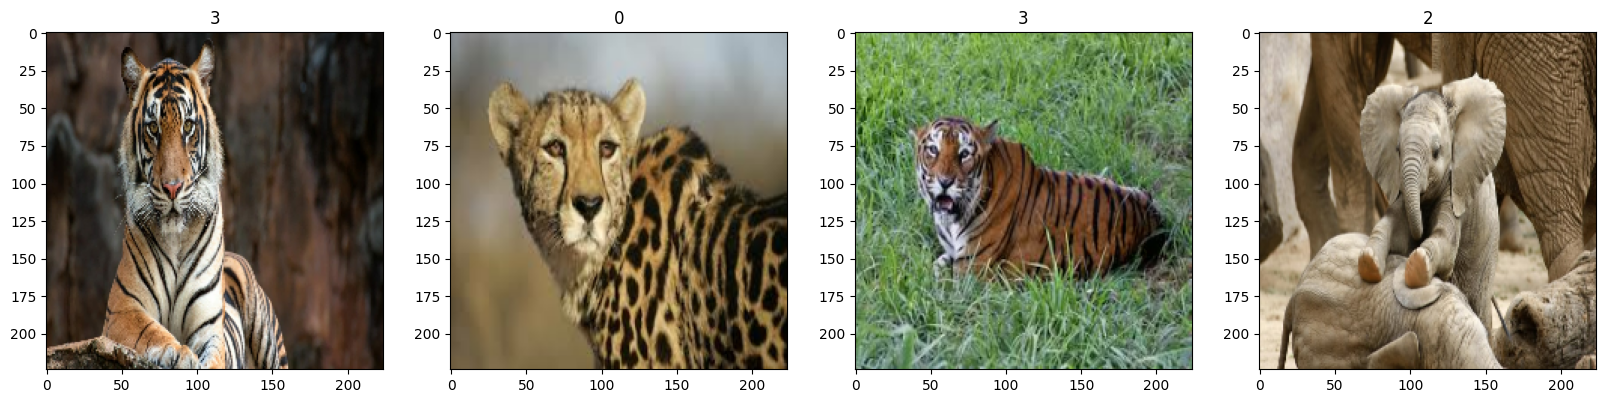

In [18]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [20]:
data=data.map(lambda x, y: (x / 255.0, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [21]:

total_batches = len(data)
train_size = int(0.8 * total_batches)
test_size = total_batches - train_size

train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [22]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



**Q.6** Compile your model

In [23]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [24]:
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
41/41 [==============================] - 120s 3s/step - loss: 1.5740 - accuracy: 0.3361 - val_loss: 1.2329 - val_accuracy: 0.4899
Epoch 2/10
41/41 [==============================] - 28s 598ms/step - loss: 1.1588 - accuracy: 0.5061 - val_loss: 0.9711 - val_accuracy: 0.6203
Epoch 3/10
41/41 [==============================] - 26s 600ms/step - loss: 0.9229 - accuracy: 0.6395 - val_loss: 0.7265 - val_accuracy: 0.7565
Epoch 4/10
41/41 [==============================] - 26s 593ms/step - loss: 0.7474 - accuracy: 0.7172 - val_loss: 0.7367 - val_accuracy: 0.7159
Epoch 5/10
41/41 [==============================] - 26s 599ms/step - loss: 0.5755 - accuracy: 0.8018 - val_loss: 0.5118 - val_accuracy: 0.8435
Epoch 6/10
41/41 [==============================] - 34s 790ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.4657 - val_accuracy: 0.8232
Epoch 7/10
41/41 [==============================] - 26s 601ms/step - loss: 0.2653 - accuracy: 0.9139 - val_loss: 0.3781 - val_accuracy: 0.8812
E

**Q.8** Test your code with test set

In [25]:
loss, accuracy = model.evaluate(test_data)

11/11 [==============================] - 13s 74ms/step - loss: 0.3070 - accuracy: 0.9159


In [26]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9159420132637024


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**